<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 3: Kugelfunktionen
## Legendre polynomials, spherical harmonics
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

We first import libraries we will need. This time, besides the standard `numpy` and `matplotlib`
libraries, we need special functions from the `scipy` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.special import legendre
from scipy.special import lpn
from scipy.special import lpmn
from scipy.special import sph_harm
from scipy.special import factorial

----
## Legendre polynomials

(see [wiki](https://en.wikipedia.org/wiki/Legendre_polynomials))

Legendre polynomials $P_n(x)$ with $n$ the degree and $x \in [-1,1]$ the argument are solutions
of Legendre's differential equation:
$$
\left( 1-x^2 \right) \frac{d^2}{dx^2} P_n(x) 
- 2 x \frac{d}{dx} P_n(x)
+ n(n+1) P_n(x)
=0
$$

A recursive solution for Legendre polynomials, defined on $x \in [-1,1]$, is:
$$
 P_n(x) = -\frac{n-1}{n} P_{n-2}(x)
          +\frac{2n-1}{n} x P_{n-1}(x),
$$
where we have to know the first two polynomials:
$$
\begin{array}{rcl}
P_0(x) &=& 1 \\
P_1(x) &=& x
\end{array}
$$

In `scipy.special`, there are two function for the calculation of Legendre polynomials:

- `lpn`, which calculates the Legendre polynomial for degree $n$ and a scalar value of $x$.
- `legendre`, which uses `lpn` and returns a polynom.

In [2]:
x=np.linspace(-1,1,51)
nmax=4
mmax=nmax

 
1
 
1 x
     2
1.5 x - 0.5
     3
2.5 x - 1.5 x


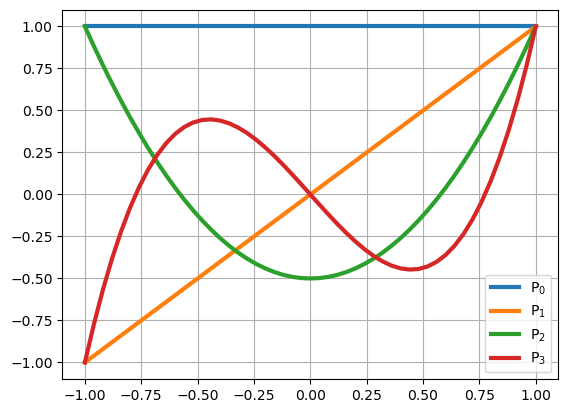

In [3]:
y = np.zeros(len(x)*(nmax)).reshape(nmax,len(x))
for n in range(nmax):
    Pn = legendre(n)
    print(Pn)
    y[n,:] = Pn(x)
    
for n in range(nmax):
    plt.plot(x,y[n,:],linewidth=3,label='P$_{'+str(n)+'}$')
plt.grid()
plt.legend()

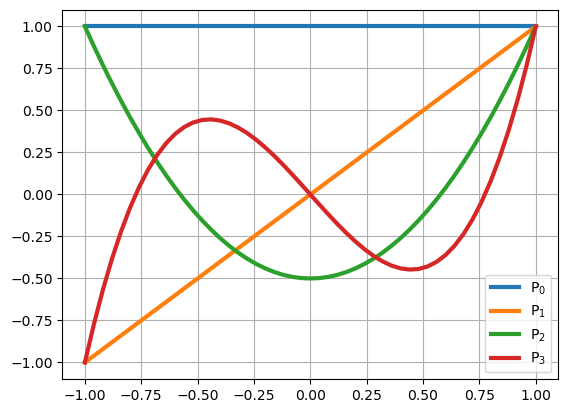

In [4]:
y = np.zeros(len(x)*(nmax)).reshape(nmax,len(x))
for n in range(nmax):
    for i in range(len(x)):
        Pn = lpn(n,x[i])
        y[n,i] = Pn[0][n]
    
for n in range(nmax):
    plt.plot(x,y[n,:],linewidth=3,label='P$_{'+str(n)+'}$')
plt.grid()
plt.legend()

Legendre functions are **orthogonal** over the interval [-1,1]:
$$
\int_{-1}^{1} P_{n'}(x) P_n(x) dx = \frac{2}{2n+1} \delta_{nn'}
$$

Test this relation with an integration ...

In [5]:
def pn1n2(x,n1,n2):
    # product of P_n1 * P_n2 for single x
    pn = lpn(n1,x)[0][n1]*lpn(n2,x)[0][n2]
    return pn

n1=3; n2=3
ortho_numerical = scipy.integrate.quad(pn1n2,-1,1,args=(n1,n2))
ortho_analytical = 2/(2*n1+1)
print('Numerical integration: ',ortho_numerical)
print('Analytical result:     ',ortho_analytical)

Numerical integration:  (0.28571428571428575, 3.172065784643305e-15)
Analytical result:      0.2857142857142857


----
## Associated Legendre polynomials

(see [wiki](https://en.wikipedia.org/wiki/Associated_Legendre_polynomials))

Associated Legendre polynomials $P_n^m(x)$ with $n$ the degree and the order $m$, 
and $x \in [-1,1]$ the argument are solutions of general Legendre equation:
$$
\left( 1-x^2 \right) \frac{d^2}{dx^2} P_n^m(x) 
- 2 x \frac{d}{dx} P_n^m(x)
+ \left[ n(n+1) - \frac{m^2}{1-x^2} \right]  P_n^m(x)
=0
$$

A recursive solution for associated Legendre polynomials, defined on $x \in [-1,1]$, is:
$$
(n-m+1) P_{n+1}^{m}(x) = (2n+1) x P_{n}^{m}(x) - (l+m) P_{n-1}^{m}(x)
$$

In `scipy.special`, the function for the calculation of associated Legendre polynomials is:

- `lpmn`, which calculates the associated Legendre polynomial for degree $n$, order $m$, 
and a scalar value of $x$.

- Here, `lpmn` first takes as argument order $m$ first, then degree $n$, followed by the argument $x$.
- Then, `lpmn` returns two arrays, the first one (Pnm[0]) the associated Legendre polynomials,
the second one (Pnm[1]) their first derivatives.
- Each array is stored as matrix, with $n$ as columns and $m$ as rows: $Pnm[0][m,n]$. 
- Note the zeros in the lower triangle! These entries would be for $m>n$, which is not defined ...

(4, 4, 51)


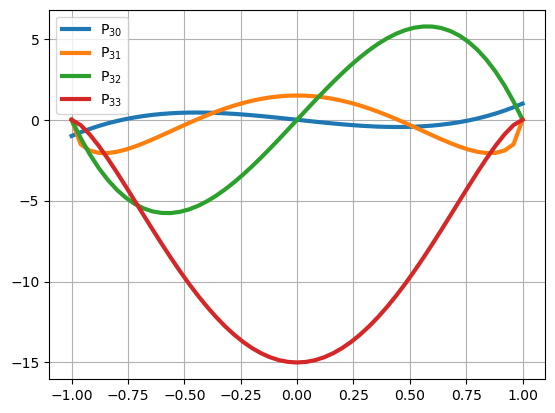

In [6]:
y = np.zeros(len(x)*nmax*mmax).reshape(nmax,mmax,len(x))
print(y.shape)
for n in range(nmax):
    for m in range(n+1):
        for i in range(len(x)):
            Pnm = lpmn(m,n,x[i])
            y[n,m,i] = Pnm[0][m,n]
            
for m in range(nmax):
    plt.plot(x,y[nmax-1,m,:],linewidth=3,label='P$_{'+str(n)+str(m)+'}$')
plt.grid()
plt.legend()

Note, that $P_3^0(x)$ is $P_3(x)$ in the above definition.

Associated Legendre functions are in parts **orthogonal** over the interval [-1,1]:
$$
\int_{-1}^{1} P_{n'}^m(x) P_n^m(x) dx = \frac{2}{(2n+1)} \frac{(n+m)!}{(n-m)!} \delta_{nn'}
$$

Test this relation with an integration ...

In [7]:
def pn1n2m(x,n1,n2,m):
    # product of P_n1^m * P_n2^m for single x
    pnm = lpmn(m,n1,x)[0][m,n1]*lpmn(m,n2,x)[0][m,n2]
    return pnm

n1=4; n2=4;m=1
#n1=4; n2=4;m=4
ortho_numerical = scipy.integrate.quad(pn1n2m,-1,1,args=(n1,n2,m))
ortho_analytical = 2*factorial(n1+m)/(2*n1+1)/factorial(n1-m)
print('Numerical integration: ',ortho_numerical)
print('Analytical result:     ',ortho_analytical)

Numerical integration:  (4.444444444444445, 4.934324553889585e-14)
Analytical result:      4.444444444444445




We normalize the calculated associated Legendre polynomials:
$$
P_{nm} = \sqrt{2n+1} \frac{(n-m)!}{(n+m)!} P_n^m
$$

(4, 4, 51)


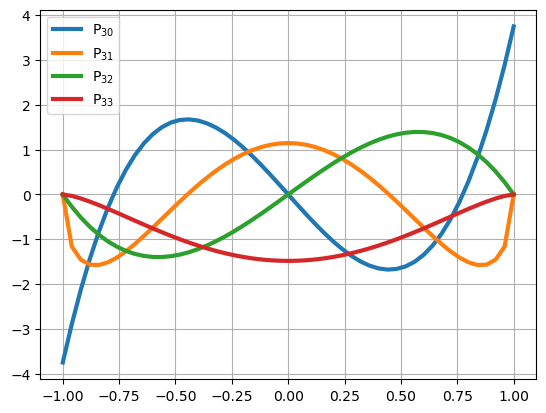

In [8]:
y = np.zeros(len(x)*nmax*mmax).reshape(nmax,mmax,len(x))
print(y.shape)
for n in range(nmax):
    for m in range(n+1):
        for i in range(len(x)):
            Pnm = lpmn(m,n,x[i])
            if (m == 0):
                norm = np.sqrt(2*(2*n+1))
            else:
                norm = np.sqrt((2*n+1)*factorial(n-m)/factorial(n+m))
            y[n,m,i] = norm*Pnm[0][m,n]
            

for m in range(nmax):
    plt.plot(x,y[nmax-1,m,:],linewidth=3,label='P$_{'+str(n)+str(m)+'}$')
plt.grid()
plt.legend()

----
## Spherical harmonics

(see [wiki](https://en.wikipedia.org/wiki/Spherical_harmonics))

The standard normalisation for spherical harmonics (e.g. in physics), also used by the
`scipy` package `sph_harm`, is:
$$
Y_n^m(\vartheta,\Phi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}} P_n^m(\cos\vartheta) e^{im \Phi}
$$
with
- $\Theta \in [90,-90]$ latitude
- $\vartheta \in [0,180]$ co-latitude
- $\Phi \in [0,360]$ longitude

Note: $x=\cos(\vartheta)$.

Note: **Latitude** $\Theta$ and **Co-latitude** $\vartheta$ are (roughly) related through:
$$
\Theta = 90 - \vartheta
$$

However, both in geodesy and in magnetics, the normalisation is different:

- **Geodesy**
$$
Y_n^m(\vartheta,\Phi) = \sqrt{2n+1 \frac{(n-m)!}{(n+m)!}} P_n^m(\cos\vartheta) e^{im \Phi}
$$
- **Magnetics** (Schmidt normalisation)
$$
Y_n^m(\vartheta,\Phi) = \sqrt{\frac{(n-m)!}{(n+m)!}} P_n^m(\cos\vartheta) e^{im \Phi}
$$
We need to take this into account later, as the geodetical and the magnetic coefficients
are defined based on these two normalisation schemes!

In [9]:
# define coordinates
d2r   = np.pi/180.
dlong = 101 #21
dcolat = 51 #11
colat = np.linspace(0, np.pi, dcolat)
long  = np.linspace(0, 2*np.pi, dlong)
colat, long = np.meshgrid(colat, long)
print(colat.shape)

(101, 51)


Associated Legendre functions are in parts **orthogonal** over the interval [-1,1]:
$$
\int_{\theta=0}^{\pi}
\int_{\phi=0}^{2\pi}
Y_{n}^{m}(\theta,\phi) Y_{n'}^{m'}(\theta,\phi) d\Omega = \delta_{nn'} \delta_{mm'}
$$

Test this relation with an integration ...

In [10]:
def Yn1m1Yn2m2(long,colat,n1,n2,m1,m2):
    # product of P_n1^m * P_n2^m for single x
    Ynm = (sph_harm(m1,n1,long,colat) * sph_harm(m2,n2,long,colat)) * complex(np.sin(colat))
    return Ynm

n1=4; n2=4;m1=0;m2=0
#n1=4; n2=4;m1=1;m2=1
ortho_numerical = scipy.integrate.dblquad(Yn1m1Yn2m2,0.,np.pi,0.,2*np.pi,args=(n1,n2,m1,m2))
ortho_analytical = 1.
print('Numerical integration: ',ortho_numerical)
print('Analytical result:     ',ortho_analytical)

Numerical integration:  (1.0, 1.3889752459306237e-08)
Analytical result:      1.0


/opt/miniconda3/envs/python_R/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:523: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


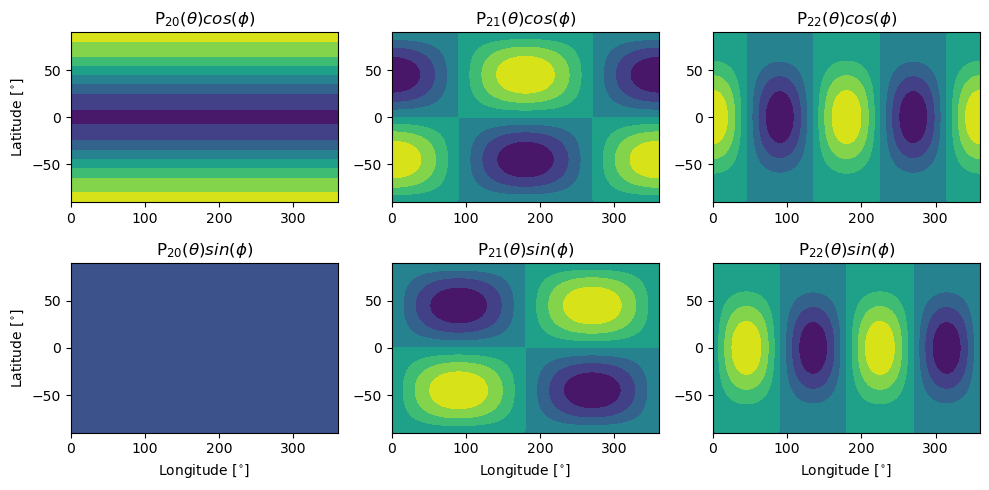

In [11]:
fig,axs = plt.subplots(2,3,figsize=(10,5))

n=2
m=0
Ynm = sph_harm(m, n, long, colat)
axs[0][0].set_title('P$_{'+str(n)+str(m)+'}(\\theta) cos(\\phi)$')
axs[0][0].set_ylabel('Latitude [$^{\circ}$]')
axs[0][0].contourf(long/d2r,90-colat/d2r,Ynm.real)
axs[1][0].set_title('P$_{'+str(n)+str(m)+'}(\\theta) sin(\\phi)$')
axs[1][0].contourf(long/d2r,90-colat/d2r,Ynm.imag)
axs[1][0].set_xlabel('Longitude [$^{\circ}$]')
axs[1][0].set_ylabel('Latitude [$^{\circ}$]')

m=1
Ynm = sph_harm(m, n, long, colat)
axs[0][1].set_title('P$_{'+str(n)+str(m)+'}(\\theta) cos(\\phi)$')
#axs[0][1].set_ylabel('Latitude [$^{\circ}$]')
axs[0][1].contourf(long/d2r,90-colat/d2r,Ynm.real)
axs[1][1].set_title('P$_{'+str(n)+str(m)+'}(\\theta) sin(\\phi)$')
axs[1][1].contourf(long/d2r,90-colat/d2r,Ynm.imag)
axs[1][1].set_xlabel('Longitude [$^{\circ}$]')
#axs[1][1].set_ylabel('Latitude [$^{\circ}$]')

m=2
Ynm = sph_harm(m, n, long, colat)
axs[0][2].set_title('P$_{'+str(n)+str(m)+'}(\\theta) cos(\\phi)$')
#axs[0][2].set_ylabel('Latitude [$^{\circ}$]')
axs[0][2].contourf(long/d2r,90-colat/d2r,Ynm.real)
axs[1][2].set_title('P$_{'+str(n)+str(m)+'}(\\theta) sin(\\phi)$')
axs[1][2].contourf(long/d2r,90-colat/d2r,Ynm.imag)
axs[1][2].set_xlabel('Longitude [$^{\circ}$]')
#axs[1][2].set_ylabel('Latitude [$^{\circ}$]')

plt.tight_layout()

And in 3D ...

In [12]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive
import ipywidgets as widgets

# define coordinates
phi = np.linspace(0, np.pi, 51)
theta = np.linspace(0, 2*np.pi, 51)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
radius = 1.
x = radius * np.sin(phi) * np.cos(theta)
y = radius * np.sin(phi) * np.sin(theta)
z = radius * np.cos(phi)

def plot_Ynm(n,m):
    # calculate spherical harmonic Ynm and plot
    if (m > n):
        m = n
    # Calculate the spherical harmonic Y(n,m) and normalize to [0,1]
    Ynm = sph_harm(m, n, theta, phi).real
    fmax, fmin = Ynm.max(), Ynm.min()
    Ynm = (Ynm - fmin)/(fmax - fmin)

    fig = plt.figure(figsize=(10,10))
    #ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=20., azim=45.)
    surf=ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.jet(Ynm))
    ax.set_axis_off()
    ax.set_title('Y_'+str(n)+str(m))
    clb=fig.colorbar(surf, shrink=1.0, aspect=2.)
    
# call interactive module
interactive_plot = interactive(plot_Ynm,
                               n=widgets.IntSlider(min=0,max=6,step=1,value=1,description='n'),
                               m=widgets.IntSlider(min=0,max=6,step=1,value=0,description='m')
                              )
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=1, description='n', max=6), IntSlider(value=0, description='m', max=6), …

----